Tarea de regresión: Construye una regresión directa sobre la dependencia del precio de un teléfono Android del año de fabricación y averigua su coste aproximado

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

os1 = pd.read_csv(r"C:\Users\Ульяна\Desktop\jupiter\datasets\1.8_phones.csv")

In [4]:
os1.head(5)

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013


In [5]:
# filtrado de datos
os_android = os1.loc[(os1['os'] == 'Android')]

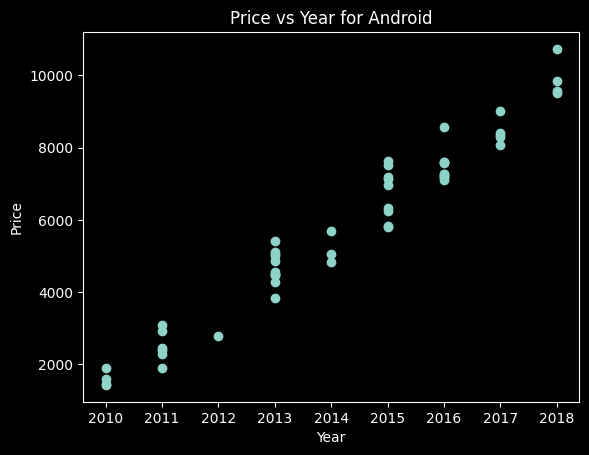

In [6]:
# precio frente a año de fabricación
plt.plot(os_android['year'], os_android['price'], 'o')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Price vs Year for Android')
plt.show()

In [7]:
# descargar atributos y valores objetivo en variables separadas
X = os_android[["year"]]
y = os_android["price"]

reg = LinearRegression().fit(X, y)

[b] = reg.coef_
a = reg.intercept_

# crear una función para la predicción de precios
def reg_prediction(year):
    return a + b * year

# precio previsto del primer teléfono android
reg.predict(X[0:1])[0]

7594.063327651937

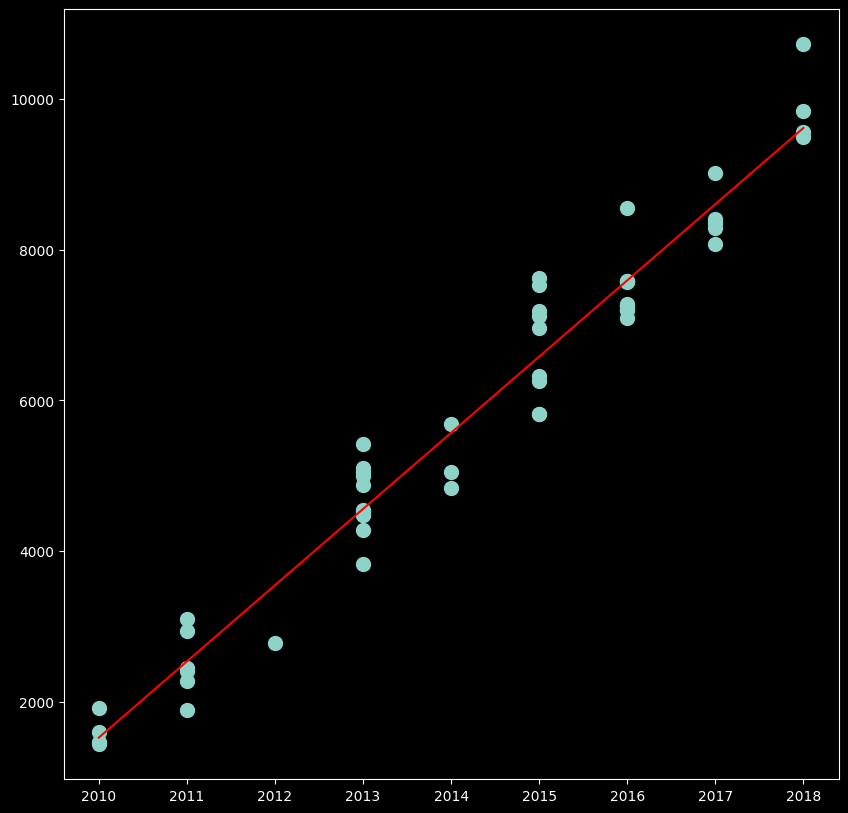

In [8]:
# creación gráfica
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()

ax.scatter(os_android["year"], os_android["price"], s=100)

ax.plot([np.array(X.year).min(), np.array(X.year).max()], [reg_prediction(np.array(X.year).min()), reg_prediction(np.array(X.year).max())], c="red")
plt.show()

Tarea de clasificación: clasificar los teléfonos en sistemas operativos iOS y Android en función de la capacidad de memoria

In [10]:
# importar el módulo responsable de los árboles de decisión

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text


X = os1[["disk"]]
y = os1["os"]

# clasificador
cl = DecisionTreeClassifier().fit(X, y)


print(export_text(cl))


cl.predict(X[:99])[0]


|--- feature_0 <= 192.00
|   |--- class: Android
|--- feature_0 >  192.00
|   |--- class: iOS



'Android'

En esta tarea, analizamos la clasificación de teléfonos en función de la memoria (disco) y obtuvimos los siguientes resultados: si el espacio en disco es superior a 192 GB, lo más probable es que se trate de iOS, y si es inferior, de Android.

Tarea de agrupación: agrupar los teléfonos en función de la capacidad de memoria y el precio.

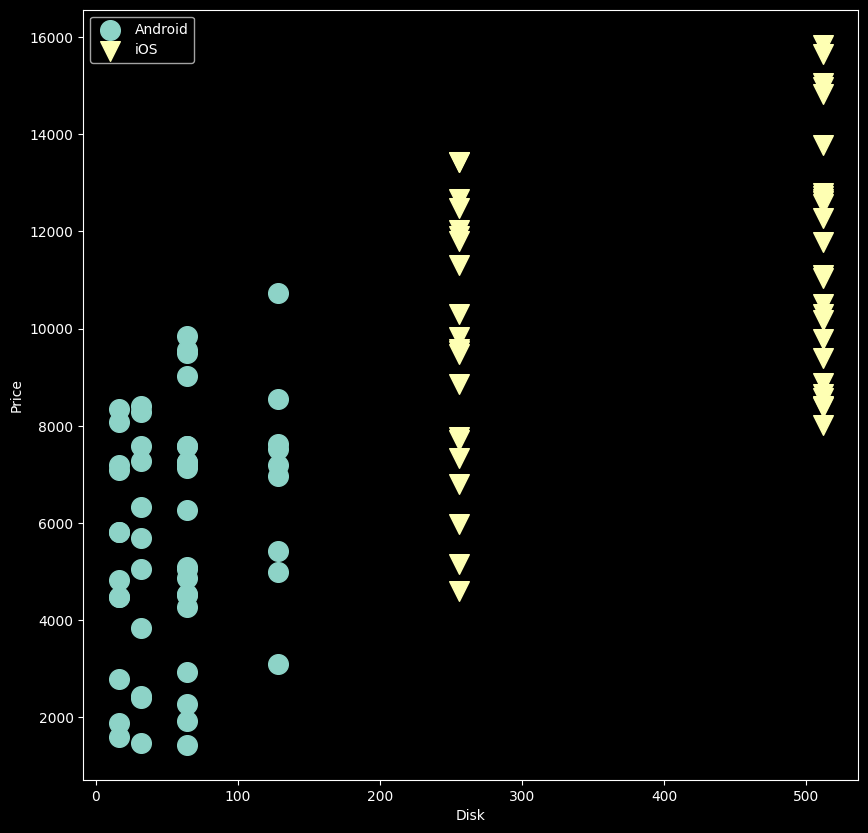

In [13]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

markers = {"Android": "o", "iOS": "v"}
for os, group in os1.groupby('os'):
    ax.scatter(group['disk'], group['price'], s=200, marker=markers[os], label=os)

# añadir leyenda
ax.legend()

# añadir etiquetas de eje
ax.set_xlabel('Disk')
ax.set_ylabel('Price')

plt.show()

In [14]:
# Hay 3 grupos y tenemos que enseñar al algoritmo cómo agruparlos
from sklearn.cluster import KMeans

# definir la variable sobre la que realizaremos el procedimiento
X = os1[["disk","price"]]

# crear un modelo de agrupación
clust = KMeans(n_clusters=3).fit(X) # 3 - porque tenemos 3 clusters, es decir, 3 grupos

clust.cluster_centers_ 
[c1, c2, c3] = clust.cluster_centers_

C:\Users\Ульяна\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


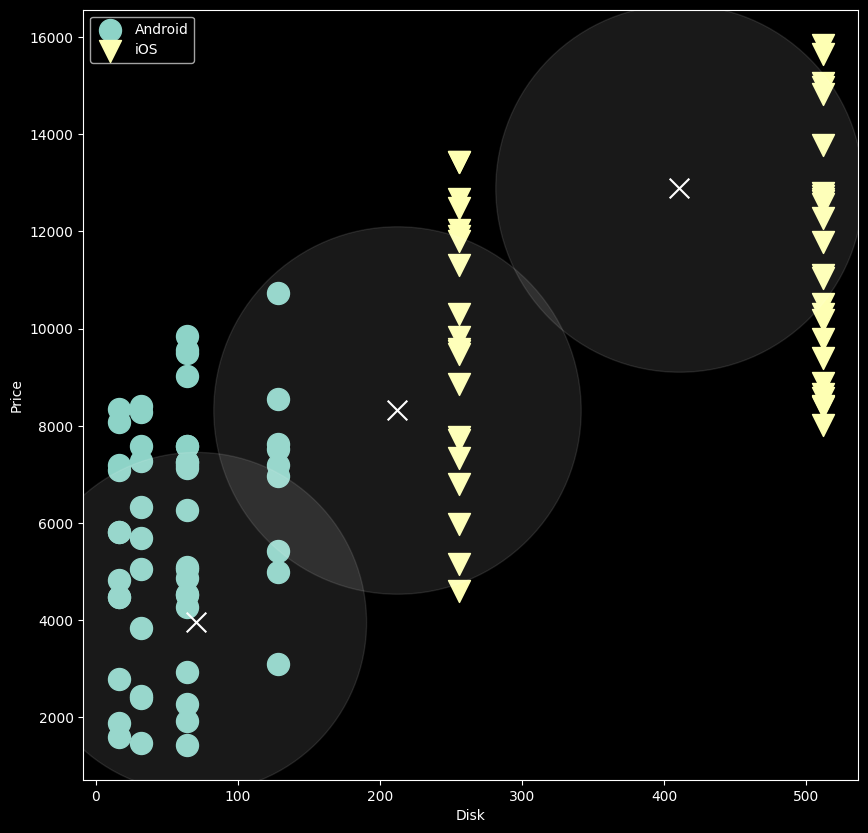

In [22]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку
ax = fig.add_subplot(111)

markers = {"Android": "o", "iOS": "v"}
for os, group in os1.groupby('os'):
    ax.scatter(group['disk'], group['price'], s=250, marker=markers[os], label=os)
    

plt.scatter(c1[0], c1[1], s=200, marker="x", c="w")
plt.scatter(c1[0], c1[1], s=200 * 3e2, c="w", alpha=0.1)

plt.scatter(c2[0], c2[1], s=200, marker="x", c="w")
plt.scatter(c2[0], c2[1], s=200 * 3.5e2, c="w", alpha=0.1)

plt.scatter(c3[0], c3[1], s=200, marker="x", c="w")
plt.scatter(c3[0], c3[1], s=200 * 3.5e2, c="w", alpha=0.1)


ax.legend()

ax.set_xlabel('Disk')
ax.set_ylabel('Price')
plt.show()

En la tarea de agrupación, estudiamos la dependencia del tamaño de la memoria del disco con el precio del teléfono (iOS y Android). Sobre este estudio podemos concluir que iOS tiene más memoria que Android, lo que nos permite concluir que los propietarios de teléfonos iOS utilizan más recursos del teléfono, es decir, su memoria. Lo que nos lleva a la conclusión de que los propietarios de iOS son más solventes y utilizan/compran/fotografían más. Así que en primer lugar deberíamos producir y vender el producto para los propietarios de iOS, ya que el beneficio será mayor.